<a href="https://colab.research.google.com/github/patricia-amos/Portfolio/blob/main/Seoul_Bike.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **SEOUL BIKE SHARING**


Exploratory data analysis and visualization using **python** and libraries such as **pandas**, **seaborn**, and **matplotlib**.

# Bike Sharing Data

This is a Kaggle data set containing number of bike rentals per hour, date of rental, and the corresponding weather information (Temperature, Humidity, Windspeed, Visibility, Dewpoint, Solar radiation, Snowfall, Rainfall) during the bike rental.

You can find the data set here: https://www.kaggle.com/datasets/joebeachcapital/seoul-bike-sharing

Feature Information:

*   Date : year-month-day
*   Rented Bike count - Count of bikes rented at each hour
*  Hour - Hour of he day
*  Temperature-Temperature in Celsius
*   Humidity - %
*   Windspeed - m/s
*   Visibility - 10m
*   Dew point temperature - Celsius
*   Solar radiation - MJ/m2
*   Rainfall - mm
*   Snowfall - cm
*   Seasons - Winter, Spring, Summer, Autumn
*   List item
*   Holiday - Holiday/No holiday
*   Functional Day - NoFunc(Non Functional Hours), Fun(Functional hours)


# Importing the data and python libraries

In [1]:
#Importing the python libraries (pandas, datetime for data processing, seaborn and matplotlib for data visualization)

import pandas as pd
from datetime import date
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
from matplotlib import rcParams, cycler
import matplotlib.colors as mcolors
%matplotlib inline


In [2]:
#Allowing connection of Google Collab to Google Drive as source of data set

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
#Loading data from csv file
main_data = pd.read_csv("/content/drive/MyDrive/SeoulBikeData.csv",encoding='latin1')

# Data Inspection and Cleaning



In this section, we are focused on getting the overview of the data by checking the data shape, columns, sample values and statistics and applying data cleaning techniques to fields with missing or null values, duplicates, incorrect data types and so on.



In [4]:
main_data

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
4,01/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8755,30/11/2018,1003,19,4.2,34,2.6,1894,-10.3,0.0,0.0,0.0,Autumn,No Holiday,Yes
8756,30/11/2018,764,20,3.4,37,2.3,2000,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes
8757,30/11/2018,694,21,2.6,39,0.3,1968,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes
8758,30/11/2018,712,22,2.1,41,1.0,1859,-9.8,0.0,0.0,0.0,Autumn,No Holiday,Yes


In [5]:
#To show statistics per column

main_data.describe()

,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm)
count,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000
mean,704.602055,11.500000,12.882922,58.226256,1.724909,1436.825799,4.073813,0.569111,0.148687,0.075068
std,644.997468,6.922582,11.944825,20.362413,1.036300,608.298712,13.060369,0.868746,1.128193,0.436746
min,0.000000,0.000000,-17.800000,0.000000,0.000000,27.000000,-30.600000,0.000000,0.000000,0.000000
25%,191.000000,5.750000,3.500000,42.000000,0.900000,940.000000,-4.700000,0.000000,0.000000,0.000000
50%,504.500000,11.500000,13.700000,57.000000,1.500000,1698.000000,5.100000,0.010000,0.000000,0.000000
75%,1065.250000,17.250000,22.500000,74.000000,2.300000,2000.000000,14.800000,0.930000,0.000000,0.000000
max,3556.000000,23.000000,39.400000,98.000000,7.400000,2000.000000,27.200000,3.520000,35.000000,8.800000


In [6]:
#To check if there are null values in the data set

main_data.isnull().sum()

Date                         0
Rented Bike Count            0
Hour                         0
Temperature(°C)              0
Humidity(%)                  0
Wind speed (m/s)             0
Visibility (10m)             0
Dew point temperature(°C)    0
Solar Radiation (MJ/m2)      0
Rainfall(mm)                 0
Snowfall (cm)                0
Seasons                      0
Holiday                      0
Functioning Day              0
dtype: int64

In [7]:
#To check the data types per column

main_data.dtypes

Date                          object
Rented Bike Count              int64
Hour                           int64
Temperature(°C)              float64
Humidity(%)                    int64
Wind speed (m/s)             float64
Visibility (10m)               int64
Dew point temperature(°C)    float64
Solar Radiation (MJ/m2)      float64
Rainfall(mm)                 float64
Snowfall (cm)                float64
Seasons                       object
Holiday                       object
Functioning Day               object
dtype: object

In [8]:
#To convert Date data type from Object to DateTime

main_data['Date']=pd.to_datetime(main_data['Date'], dayfirst = True)

In [9]:
#Double checking if date column is converted to datetime

main_data['Date']

0      2017-12-01
1      2017-12-01
2      2017-12-01
3      2017-12-01
4      2017-12-01
          ...    
8755   2018-11-30
8756   2018-11-30
8757   2018-11-30
8758   2018-11-30
8759   2018-11-30
Name: Date, Length: 8760, dtype: datetime64[ns]

In [10]:
#To know max range of date included in the data

main_data['Date'].max()


Timestamp('2018-11-30 00:00:00')

In [11]:
#To know min range of date included in the data

main_data['Date'].min()

Timestamp('2017-12-01 00:00:00')

In [12]:
#Placing an index column for additional reference

main_data['Index'] = range(1, len(main_data) + 1)

In [13]:
#To know number of unique values per column. This is for counter checking the values included in the columns.
#For example, the hour column has 24 unique numbers, representing 24 hrs of the day.

main_data.nunique()

Date                          365
Rented Bike Count            2166
Hour                           24
Temperature(°C)               546
Humidity(%)                    90
Wind speed (m/s)               65
Visibility (10m)             1789
Dew point temperature(°C)     556
Solar Radiation (MJ/m2)       345
Rainfall(mm)                   61
Snowfall (cm)                  51
Seasons                         4
Holiday                         2
Functioning Day                 2
Index                        8760
dtype: int64

## EDA

This is where we get to a deeper dive into our data by analyzing and looking for patterns and relationships with variables on our data set. We are also creating data visualizations to represent the statistics graphically. Also, this section includes data manipulation to columns and values to our data set that would fit our analysis.

There are number of things that I want to focus on with this data. These are listed below.

*   Hourly bike rental by weekdays during different seasons
*   Hourly bike rental by weekends during different seasons
*   Number of bike rental by day of the week during different seasons
*   Number of bike rental per month
*   Correlation of weather variables to bike rental
*   Bike rentals during holidays and non holidays









First, we need to add columns that converts date to day of the week and weekday or weekend to be able analyze the first two focus of our EDA.

In [14]:
#To add a column that converts Date to day of week

main_data['Day of Week'] = main_data['Date'].dt.day_name()
main_data

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day,Index,Day of Week
0,2017-12-01,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,1,Friday
1,2017-12-01,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,2,Friday
2,2017-12-01,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes,3,Friday
3,2017-12-01,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,4,Friday
4,2017-12-01,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes,5,Friday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8755,2018-11-30,1003,19,4.2,34,2.6,1894,-10.3,0.0,0.0,0.0,Autumn,No Holiday,Yes,8756,Friday
8756,2018-11-30,764,20,3.4,37,2.3,2000,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes,8757,Friday
8757,2018-11-30,694,21,2.6,39,0.3,1968,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes,8758,Friday
8758,2018-11-30,712,22,2.1,41,1.0,1859,-9.8,0.0,0.0,0.0,Autumn,No Holiday,Yes,8759,Friday


In [15]:
#To add a column that shows if data fall during weekdays or weekend. Weekday value returns 1 and  Weekend value returns 0.

main_data['Weekday'] = pd.to_datetime(main_data['Date']).dt.dayofweek
main_data['Weekday'] = (main_data["Weekday"] < 5).astype(float)
main_data

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day,Index,Day of Week,Weekday
0,2017-12-01,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,1,Friday,1.0
1,2017-12-01,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,2,Friday,1.0
2,2017-12-01,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes,3,Friday,1.0
3,2017-12-01,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,4,Friday,1.0
4,2017-12-01,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes,5,Friday,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8755,2018-11-30,1003,19,4.2,34,2.6,1894,-10.3,0.0,0.0,0.0,Autumn,No Holiday,Yes,8756,Friday,1.0
8756,2018-11-30,764,20,3.4,37,2.3,2000,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes,8757,Friday,1.0
8757,2018-11-30,694,21,2.6,39,0.3,1968,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes,8758,Friday,1.0
8758,2018-11-30,712,22,2.1,41,1.0,1859,-9.8,0.0,0.0,0.0,Autumn,No Holiday,Yes,8759,Friday,1.0


In [16]:
#Creating a new table that only includes dates that falls on weekdays

main_data_weekday = main_data[main_data['Weekday'] == 1]
main_data_weekday

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day,Index,Day of Week,Weekday
0,2017-12-01,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,1,Friday,1.0
1,2017-12-01,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,2,Friday,1.0
2,2017-12-01,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes,3,Friday,1.0
3,2017-12-01,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,4,Friday,1.0
4,2017-12-01,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes,5,Friday,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8755,2018-11-30,1003,19,4.2,34,2.6,1894,-10.3,0.0,0.0,0.0,Autumn,No Holiday,Yes,8756,Friday,1.0
8756,2018-11-30,764,20,3.4,37,2.3,2000,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes,8757,Friday,1.0
8757,2018-11-30,694,21,2.6,39,0.3,1968,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes,8758,Friday,1.0
8758,2018-11-30,712,22,2.1,41,1.0,1859,-9.8,0.0,0.0,0.0,Autumn,No Holiday,Yes,8759,Friday,1.0


In [17]:
#Creating a new table that only includes dates that falls on weekends

main_data_weekend = main_data[main_data['Weekday'] == 0]
main_data_weekend

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day,Index,Day of Week,Weekday
24,2017-12-02,328,0,-1.8,87,1.1,994,-3.6,0.0,0.0,0.0,Winter,No Holiday,Yes,25,Saturday,0.0
25,2017-12-02,308,1,-2.2,86,0.6,990,-4.2,0.0,0.0,0.0,Winter,No Holiday,Yes,26,Saturday,0.0
26,2017-12-02,262,2,-2.9,86,1.5,1256,-4.9,0.0,0.0,0.0,Winter,No Holiday,Yes,27,Saturday,0.0
27,2017-12-02,167,3,-3.5,81,2.2,1221,-6.2,0.0,0.0,0.0,Winter,No Holiday,Yes,28,Saturday,0.0
28,2017-12-02,89,4,-3.8,79,2.0,1167,-6.9,0.0,0.0,0.0,Winter,No Holiday,Yes,29,Saturday,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8635,2018-11-25,616,19,6.3,73,1.1,524,1.8,0.0,0.0,0.4,Autumn,No Holiday,Yes,8636,Sunday,0.0
8636,2018-11-25,570,20,5.5,77,0.7,490,1.7,0.0,0.0,0.4,Autumn,No Holiday,Yes,8637,Sunday,0.0
8637,2018-11-25,546,21,4.7,81,1.0,437,1.7,0.0,0.0,0.4,Autumn,No Holiday,Yes,8638,Sunday,0.0
8638,2018-11-25,496,22,4.2,82,0.9,405,1.3,0.0,0.0,0.4,Autumn,No Holiday,Yes,8639,Sunday,0.0


In [18]:
#Creating a table that only includes dates that groups weekday data by hourly mean bike rental per season.

hourly_seasons_weekday = pd.pivot_table(main_data_weekday, index = 'Hour', columns='Seasons', values='Rented Bike Count', aggfunc='mean', fill_value=0).reset_index().rename_axis(None, axis=1)
hourly_seasons_weekday

,Hour,Autumn,Spring,Summer,Winter
0,0,572.661538,429.848485,824.484848,154.671875
1,1,431.984615,319.878788,632.030303,145.703125
2,2,286.030769,218.848485,439.742424,102.625000
3,3,191.000000,142.166667,295.712121,66.312500
4,4,132.476923,94.984848,195.909091,46.312500
5,5,152.338462,120.712121,251.257576,56.921875
6,6,376.584615,300.651515,558.757576,112.906250
7,7,868.784615,751.681818,1090.227273,267.750000
8,8,1480.338462,1260.696970,1720.803030,543.890625
9,9,814.753846,725.045455,973.469697,293.328125


In [19]:
#Creating a table that only includes dates that groups weekend data by hourly mean bike rental per season.

hourly_seasons_weekend = pd.pivot_table(main_data_weekend, index = 'Hour', columns='Seasons', values='Rented Bike Count', aggfunc='mean', fill_value=0).reset_index().rename_axis(None, axis=1)
hourly_seasons_weekend

,Hour,Autumn,Spring,Summer,Winter
0,0,751.230769,574.153846,1088.384615,191.038462
1,1,620.038462,447.807692,868.192308,191.923077
2,2,446.384615,320.115385,673.307692,155.115385
3,3,311.884615,222.307692,461.884615,106.115385
4,4,188.884615,133.500000,294.653846,60.730769
5,5,121.961538,95.730769,232.423077,37.192308
6,6,164.653846,127.230769,300.730769,43.384615
7,7,285.692308,221.730769,426.961538,66.346154
8,8,489.461538,387.230769,651.461538,122.653846
9,9,606.307692,480.076923,752.423077,159.269231


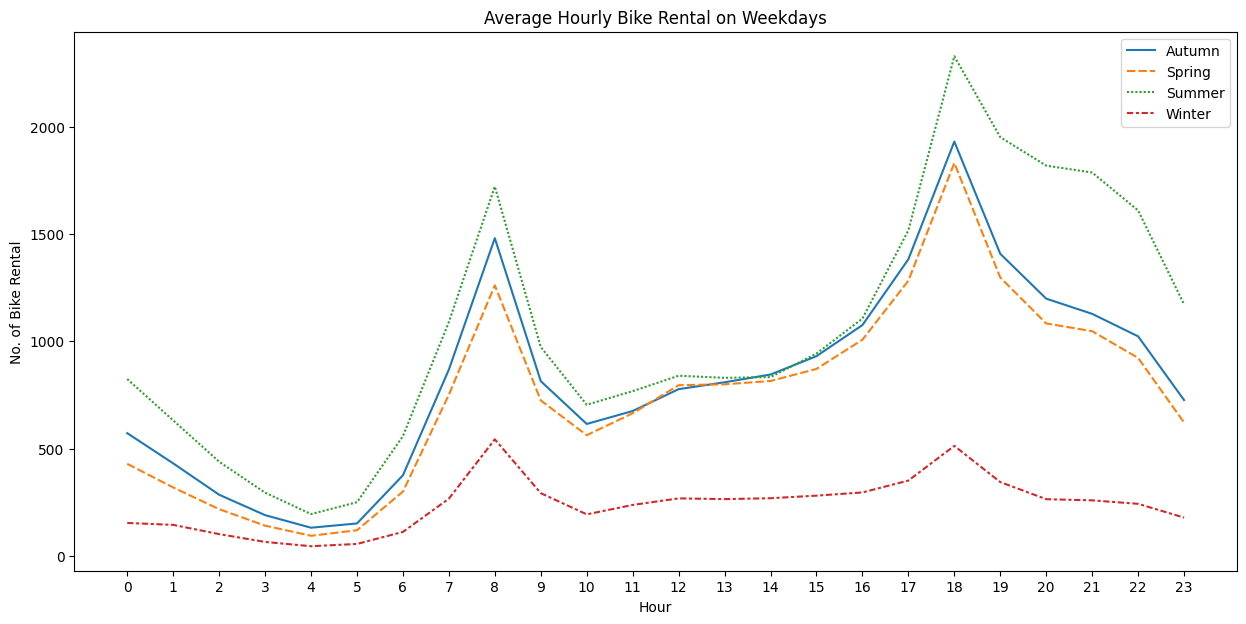

In [20]:
#Line Plot for average hourly bike rental on Weekdays per Season

plt.figure(figsize=(15,7))
sns.lineplot(data=hourly_seasons_weekday[['Autumn', 'Spring', 'Summer', 'Winter']], linestyle='solid').set_xticks(range(24))
plt.title("Average Hourly Bike Rental on Weekdays")
plt.xlabel("Hour")
plt.ylabel("No. of Bike Rental")
sns.set_context(rc={"lines.linewidth": 2})

Key Takeaway:
*   Weekday bike rentals are significantly lower during winters compared to the other seasons, on the other hand, summer has the highest number of rentals.
*   There are clearly 2 peak hours all throughout the day during weekdays, 8 am, during the first half of the day, and 6 pm during the second half of the day. Peak hour rental during the second half of the day is heigher compared to the second half of the day during Autum, Spring, and summer while the opposite, having more rentals during the peak of the first half of the day, during winter.




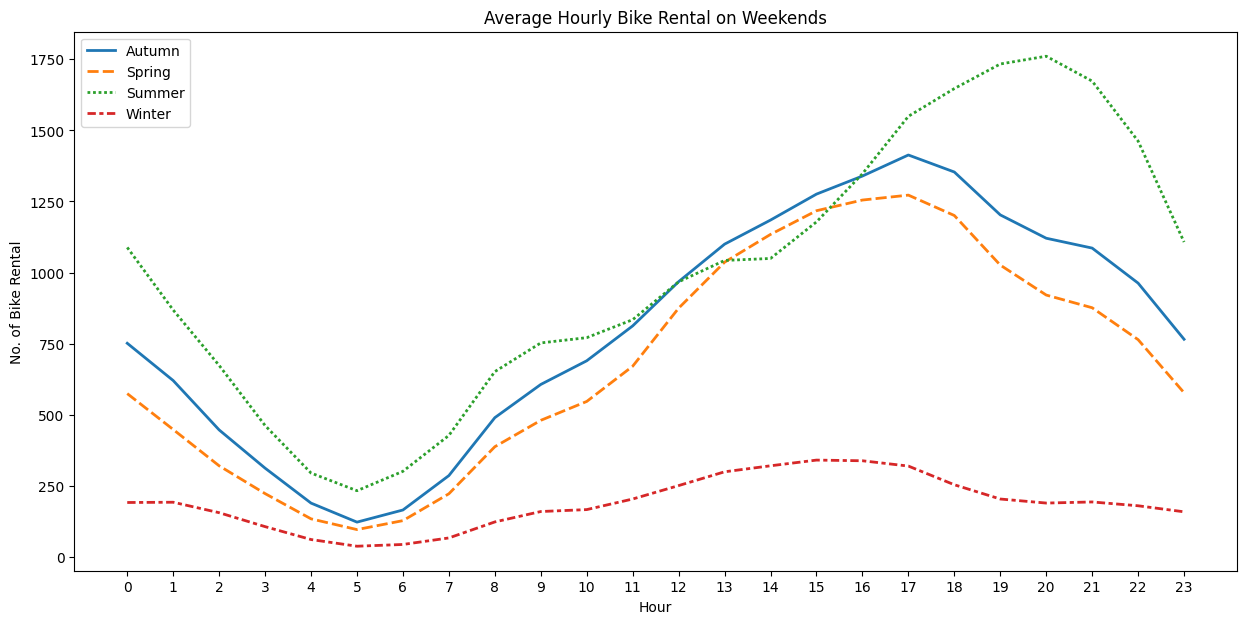

In [21]:
#Line Plot for average hourly bike rental on Weekends per Season

plt.figure(figsize=(15,7))
sns.lineplot(data=hourly_seasons_weekend[['Autumn', 'Spring', 'Summer', 'Winter']], linestyle='solid').set_xticks(range(24))
plt.title("Average Hourly Bike Rental on Weekends")
plt.xlabel("Hour")
plt.ylabel("No. of Bike Rental")
sns.set_context(rc={"lines.linewidth": 2})

Key Takeaway:

*   In comparison to weekday rentals having 2 rental peaks, there is only 1 evident hourly peak per season for weekends. There is also a gradual increase of rental per hour approaching the peak (having more rounded and flat lines) as compared to weekdays were rental increases in shorter time approaching the peak (sharper, triangular lines).  
*   Peak hours during autumn and spring falls at 5 pm, while summer has a later peak hour at 8pm. Peak hour during winter time falls earlier in a range of 3-4pm.
*   Bike rentals are the least during winter, and highest during summers.
*   Bike rentals are during weekends are lower than rental during weekdays.





In [22]:
#Creating a table that only includes that groups data by day of week and by mean bike rental per season.

dayofweek_seasons = pd.pivot_table(main_data, index = 'Day of Week', columns='Seasons', values='Rented Bike Count', aggfunc='mean', fill_value=0).reset_index().rename_axis(None, axis=1)
dayofweek = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
dayofweek_seasons['Day of Week'] = pd.Categorical(dayofweek_seasons['Day of Week'], categories=dayofweek, ordered=True)
dayofweek_seasons = dayofweek_seasons.sort_values('Day of Week')
dayofweek_seasons

,Day of Week,Autumn,Spring,Summer,Winter
1,Monday,958.801282,809.233974,924.458333,229.759615
5,Tuesday,677.413462,814.589744,1013.733974,246.173077
6,Wednesday,934.785256,717.256410,1087.128205,222.227564
4,Thursday,837.480769,607.922619,1048.128205,241.065972
0,Friday,723.612179,805.445513,1165.354167,261.887821
2,Saturday,848.455128,721.400641,1059.349359,208.910256
3,Sunday,756.637821,643.762821,930.262821,169.958333


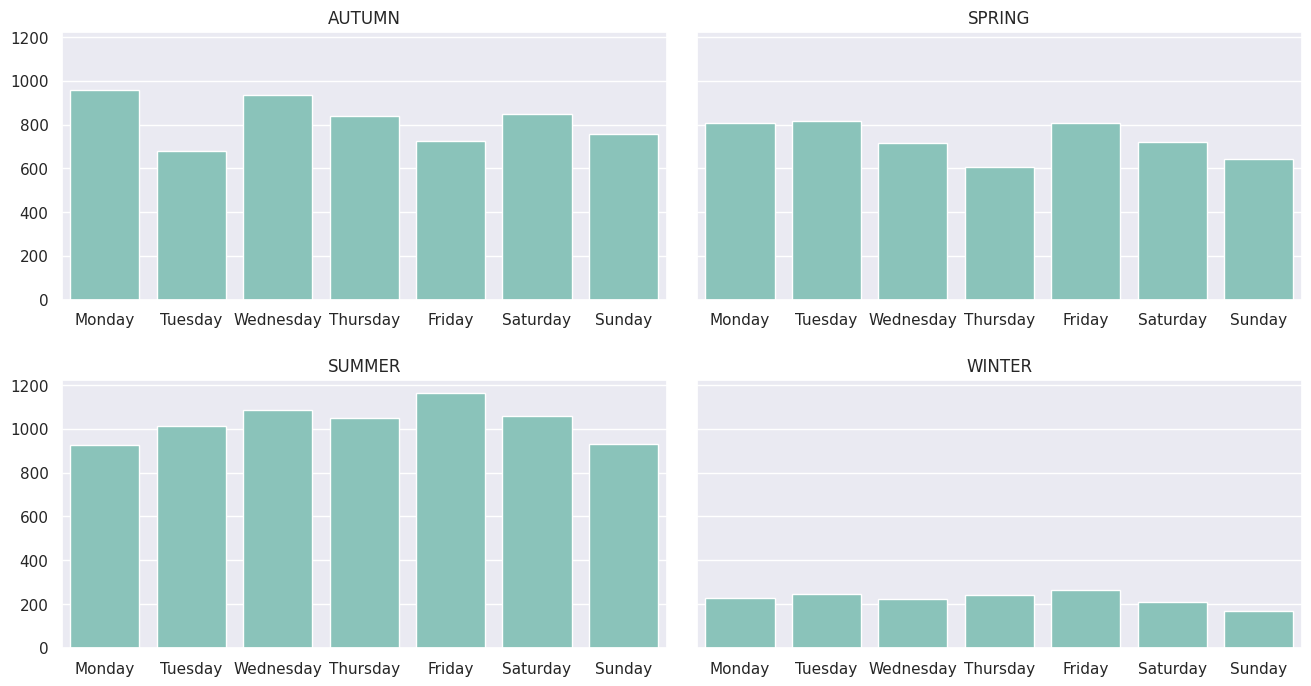

In [23]:
#Creating subplots of bar charts showing bike rentals per day of week and season

sns.set()
fig, axes = plt.subplots(2, 2, figsize=(16,8),sharey=True)

ax1 = sns.barplot(data=dayofweek_seasons, x='Day of Week', y='Autumn', ax=axes[0,0], color='#80cdc1' ).set(xlabel=None, ylabel = None, title = 'AUTUMN')
ax2 =sns.barplot(data=dayofweek_seasons, x='Day of Week', y='Spring', ax=axes[0,1], color='#80cdc1').set(xlabel=None, ylabel = None, title = 'SPRING')
ax3 =sns.barplot(data=dayofweek_seasons, x='Day of Week', y='Summer', ax=axes[1,0], color='#80cdc1').set(xlabel=None, ylabel = None, title = 'SUMMER')
ax4 =sns.barplot(data=dayofweek_seasons, x='Day of Week', y='Winter', ax=axes[1,1], color='#80cdc1').set(xlabel=None, ylabel = None, title = 'WINTER')
plt.subplots_adjust(wspace=0.05, hspace=0.3)


Key Takeaway:
*   Lowest rental during autumn falls on tuesday.
*   Lowest rental during spring falls on thursday.
*   Lowest rental during summer falls on monday and sunday.
*   Lowest rental during winter falls on sunday.
*   Winter has more consistency on bike rental all throughout the week compared to the other seasons.









In [24]:
main_data

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day,Index,Day of Week,Weekday
0,2017-12-01,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,1,Friday,1.0
1,2017-12-01,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,2,Friday,1.0
2,2017-12-01,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes,3,Friday,1.0
3,2017-12-01,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,4,Friday,1.0
4,2017-12-01,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes,5,Friday,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8755,2018-11-30,1003,19,4.2,34,2.6,1894,-10.3,0.0,0.0,0.0,Autumn,No Holiday,Yes,8756,Friday,1.0
8756,2018-11-30,764,20,3.4,37,2.3,2000,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes,8757,Friday,1.0
8757,2018-11-30,694,21,2.6,39,0.3,1968,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes,8758,Friday,1.0
8758,2018-11-30,712,22,2.1,41,1.0,1859,-9.8,0.0,0.0,0.0,Autumn,No Holiday,Yes,8759,Friday,1.0


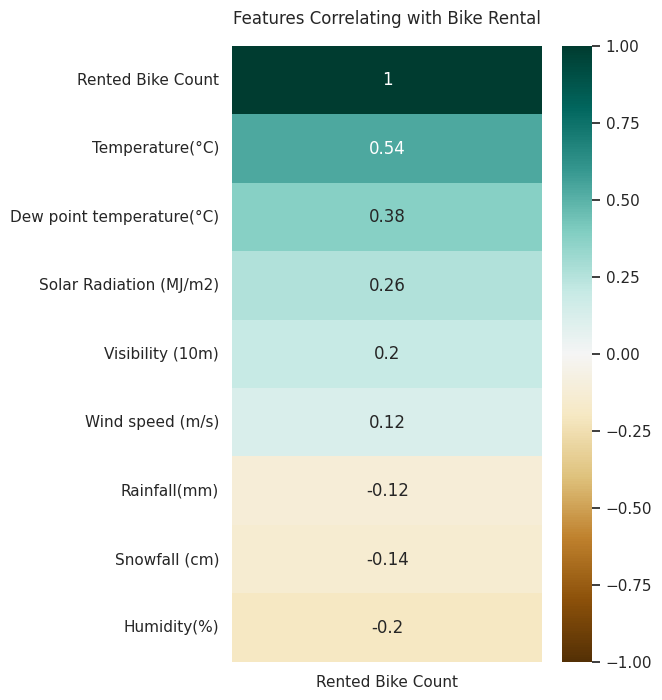

In [25]:
#Creating a heat map to find correlation of weather variables to bike rental

plt.figure(figsize=(5, 8))
heatmap = sns.heatmap((main_data.drop(['Date','Hour', 'Seasons', 'Holiday', 'Functioning Day', 'Day of Week', 'Index','Weekday'], axis=1)).corr()[['Rented Bike Count']].sort_values(by='Rented Bike Count', ascending=False), vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Features Correlating with Bike Rental', fontdict={'fontsize':12}, pad=16);

Key Takeaway:
*   Temperature has the highest correlation (0.54) with bike rental among all the weather conditions. We can also relate this to why summer season has higher bike rentals among all the seasons.



To visualize this further, we'll plot the bike rentals in relationship to temperature.

In [42]:
#Creating a table that sums up bike rentals based on temperature

temperature_rental = pd.pivot_table(main_data, index = 'Temperature(°C)', values='Rented Bike Count', aggfunc='sum', fill_value=0).reset_index().rename_axis(None, axis=1)
temperature_rental.rename(columns = {'Temperature(°C)':'Temperature'}, inplace = True)
temperature_rental

,Temperature,Rented Bike Count
0,-17.8,322
1,-17.5,291
2,-17.4,64
3,-16.9,36
4,-16.5,96
...,...,...
541,38.0,1184
542,38.7,475
543,39.0,1033
544,39.3,531


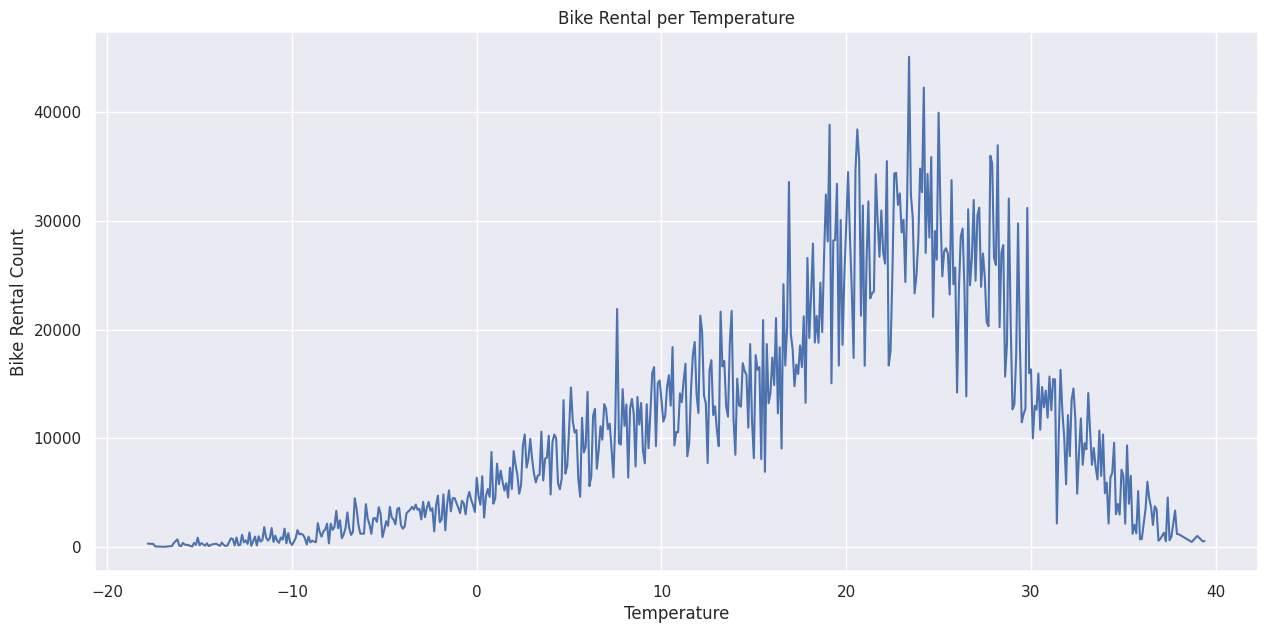

In [47]:
#Creating a line plot of bike rentals in relationship to temperature

plt.figure(figsize=(15,7))
sns.lineplot(data=temperature_rental, x="Temperature", y="Rented Bike Count")
plt.title("Bike Rental per Temperature")
plt.xlabel("Temperature")
plt.ylabel("Bike Rental Count")
sns.set_context(rc={"lines.linewidth": 2})

There is a gradual increase of bike rentals as temperature increase up to the range of 20 to 30 degrees celcius. Futher than that, we can see an inverse relationship, and a decline on bike rentals.

In [26]:
#Adding a month and year column to be able to group our values

main_data['Month & Year'] = main_data['Date'].apply(lambda x: x.strftime('%b %Y'))
main_data

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day,Index,Day of Week,Weekday,Month & Year
0,2017-12-01,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,1,Friday,1.0,Dec 2017
1,2017-12-01,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,2,Friday,1.0,Dec 2017
2,2017-12-01,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes,3,Friday,1.0,Dec 2017
3,2017-12-01,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,4,Friday,1.0,Dec 2017
4,2017-12-01,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes,5,Friday,1.0,Dec 2017
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8755,2018-11-30,1003,19,4.2,34,2.6,1894,-10.3,0.0,0.0,0.0,Autumn,No Holiday,Yes,8756,Friday,1.0,Nov 2018
8756,2018-11-30,764,20,3.4,37,2.3,2000,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes,8757,Friday,1.0,Nov 2018
8757,2018-11-30,694,21,2.6,39,0.3,1968,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes,8758,Friday,1.0,Nov 2018
8758,2018-11-30,712,22,2.1,41,1.0,1859,-9.8,0.0,0.0,0.0,Autumn,No Holiday,Yes,8759,Friday,1.0,Nov 2018


In [27]:
#Creating a table for the bike rentals grouped per month

monthly_total_rentals = pd.pivot_table(main_data, index = 'Month & Year', values=['Rented Bike Count'], aggfunc='sum', fill_value=0).reset_index().rename_axis(None, axis=1)
monthly_total_rentals['Month & Year']=pd.to_datetime(monthly_total_rentals['Month & Year'], dayfirst = True)
monthly_total_rentals = monthly_total_rentals.sort_values(('Month & Year'), ascending=True)
monthly_total_rentals['Month & Year'] = monthly_total_rentals['Month & Year'].apply(lambda x: x.strftime('%b %Y'))
monthly_total_rentals

,Month & Year,Rented Bike Count
2,Dec 2017,185330
4,Jan 2018,150006
3,Feb 2018,151833
7,Mar 2018,380594
0,Apr 2018,524227
8,May 2018,707088
6,Jun 2018,896887
5,Jul 2018,734460
1,Aug 2018,651887
11,Sep 2018,673612


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 [Text(0, 0, 'Dec 2017'),
  Text(1, 0, 'Jan 2018'),
  Text(2, 0, 'Feb 2018'),
  Text(3, 0, 'Mar 2018'),
  Text(4, 0, 'Apr 2018'),
  Text(5, 0, 'May 2018'),
  Text(6, 0, 'Jun 2018'),
  Text(7, 0, 'Jul 2018'),
  Text(8, 0, 'Aug 2018'),
  Text(9, 0, 'Sep 2018'),
  Text(10, 0, 'Oct 2018'),
  Text(11, 0, 'Nov 2018')])

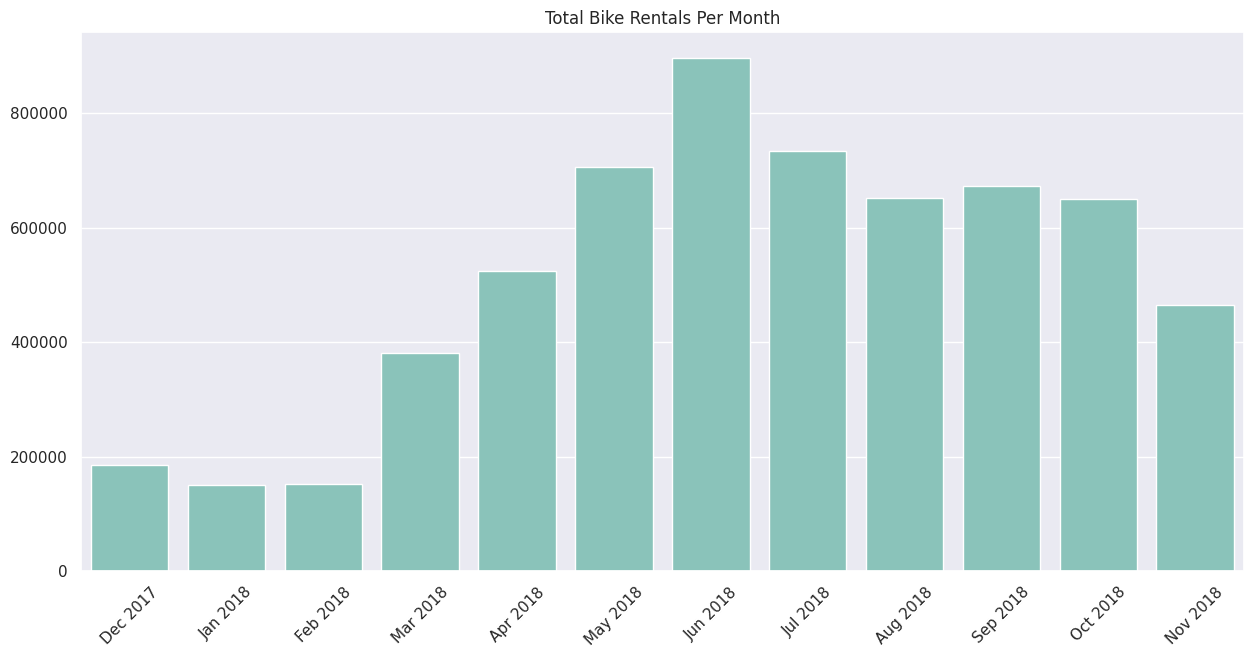

In [28]:
#Creating a bar chart of the total bike rentals per month

plt.figure(figsize=(15,7))
sns.barplot(data=monthly_total_rentals, x='Month & Year', y='Rented Bike Count', color='#80cdc1').set(xlabel=None, ylabel = None, title = 'Total Bike Rentals Per Month')
plt.xticks(rotation=45)

Key Takeaways:


*   June has the highest rentals across the year. This falls during summer seasons.
*   January and February has the lowest rental which falls during winter.





In [29]:
main_data

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day,Index,Day of Week,Weekday,Month & Year
0,2017-12-01,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,1,Friday,1.0,Dec 2017
1,2017-12-01,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,2,Friday,1.0,Dec 2017
2,2017-12-01,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes,3,Friday,1.0,Dec 2017
3,2017-12-01,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,4,Friday,1.0,Dec 2017
4,2017-12-01,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes,5,Friday,1.0,Dec 2017
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8755,2018-11-30,1003,19,4.2,34,2.6,1894,-10.3,0.0,0.0,0.0,Autumn,No Holiday,Yes,8756,Friday,1.0,Nov 2018
8756,2018-11-30,764,20,3.4,37,2.3,2000,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes,8757,Friday,1.0,Nov 2018
8757,2018-11-30,694,21,2.6,39,0.3,1968,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes,8758,Friday,1.0,Nov 2018
8758,2018-11-30,712,22,2.1,41,1.0,1859,-9.8,0.0,0.0,0.0,Autumn,No Holiday,Yes,8759,Friday,1.0,Nov 2018


In [30]:
holiday_rentals = pd.pivot_table(main_data, index = ['Date', 'Holiday'], values=['Rented Bike Count'], aggfunc='mean', fill_value=0).reset_index().rename_axis(None, axis=1)
holiday_rentals

,Date,Holiday,Rented Bike Count
0,2017-12-01,No Holiday,397.458333
1,2017-12-02,No Holiday,355.125000
2,2017-12-03,No Holiday,300.916667
3,2017-12-04,No Holiday,363.708333
4,2017-12-05,No Holiday,346.125000
...,...,...,...
360,2018-11-26,No Holiday,715.083333
361,2018-11-27,No Holiday,678.416667
362,2018-11-28,No Holiday,688.500000
363,2018-11-29,No Holiday,684.291667


[Text(0.5, 0, ''),
 Text(0, 0.5, ''),
 Text(0.5, 1.0, 'Average Daily Bike Rental for Holidays and Non Holidays')]

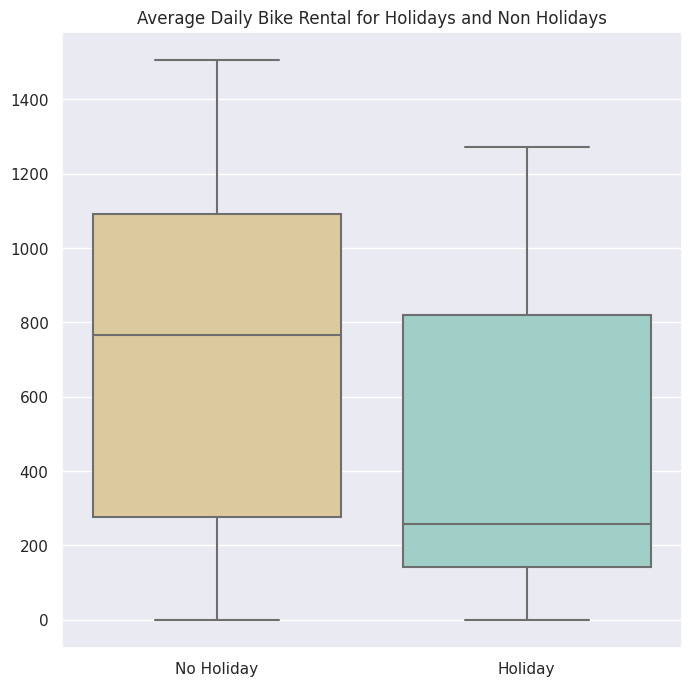

In [31]:
#Creating a box plot comparing bike rentals during Holidays and non holidays

plt.figure(figsize=(8, 8))
sns.boxplot(data=holiday_rentals, x="Holiday", y="Rented Bike Count", palette='BrBG').set(xlabel=None, ylabel = None, title = 'Average Daily Bike Rental for Holidays and Non Holidays')

Key Takeaway:
*   There is higher bike rental during non holidays compared to holidays.
*   50 percent of the number of bike rentals during holidays falls between 150 - 800 per day, and 280 - 1100 per day during non holidays.



# For further studies:

There are interesting insights that we have discovered with our data that can be further studied and utilized in application to different areas of the company.

*   Formulating marketing strategies to target hours, days of week, and months, that have lower bike rentals.
*   Using customer behavior as shown through their usage per hour, season, day of week, and month, to understand riding habits and preferences.

It is also important to take note that the data that was included on this study only covers a year. Having more data can provide us more confidence on the insights that we have gathered.  

Additional information that can be collected such as inclusion of customer profile such as age, gender, reason for rental, and home location can be useful and provide us a wider understanding of our customers.




